<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [101]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [4]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [5]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
noise.describe(include='all')

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

- Find out how many rows and columns are in `noise`.

In [7]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [8]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [9]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [10]:
noise.describe(include='all')

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

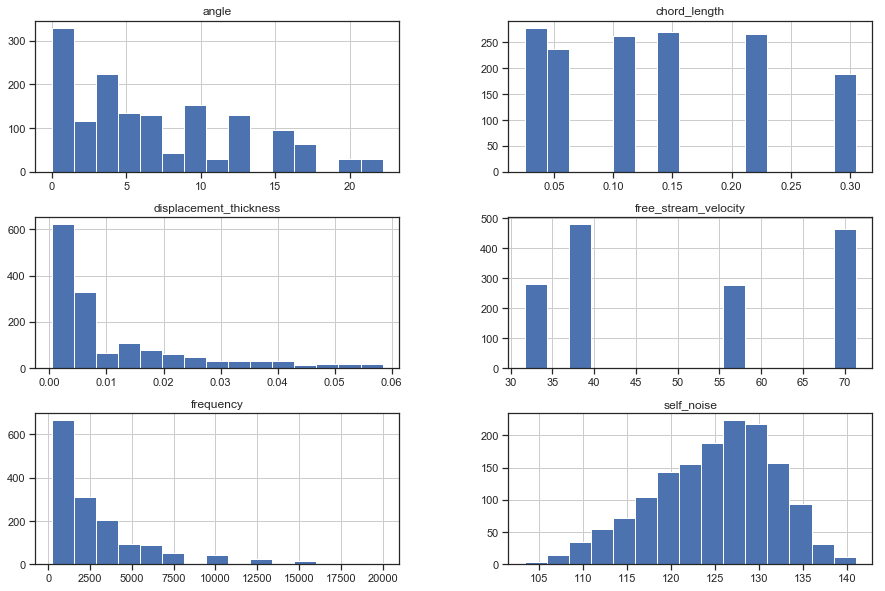

In [11]:
axis = noise.hist(bins =15, figsize = (15,10));

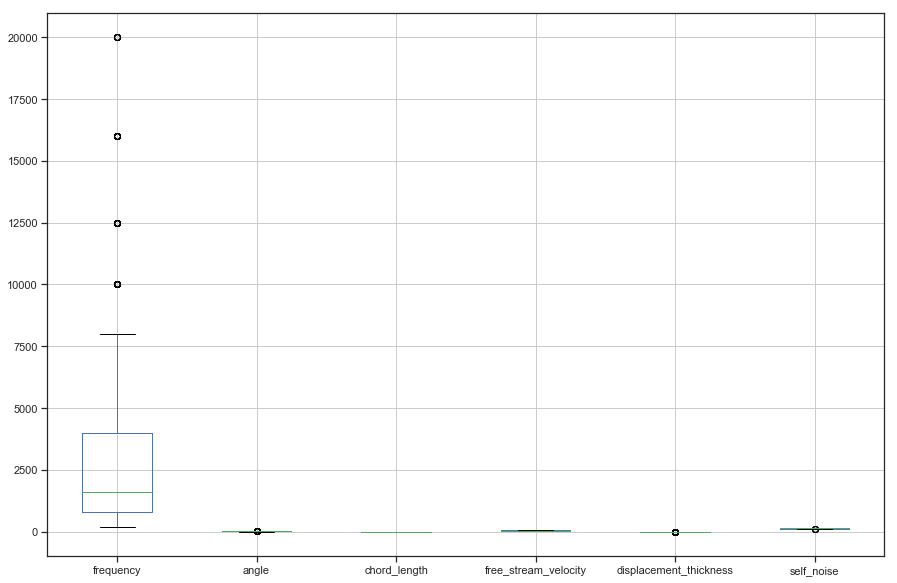

In [12]:
noise.boxplot(figsize = (15,10));

- Which variables are approximately normally distributed?

self noise is the only variable that has a close to normal distribution. 

- Which variables show strong skew?

angle, displacement thickness, and frequency are left skewed. 

- Make a scatterplot of each feature variable with the target variable "self_noise".

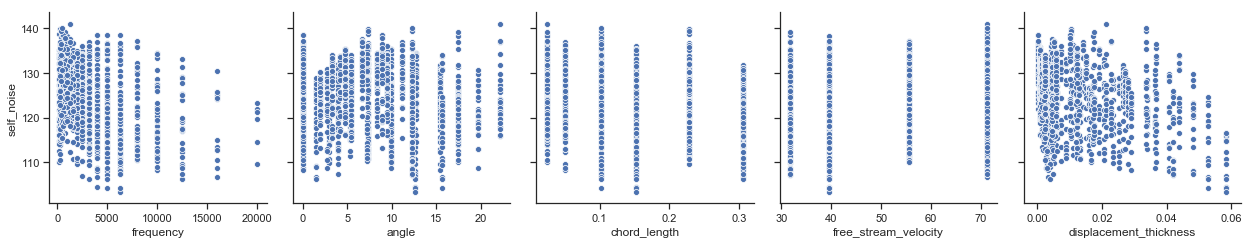

In [13]:
g = sns.pairplot(data=noise,
                 x_vars=noise.drop('self_noise', axis='columns').columns,
                 y_vars=['self_noise'],
                 height=3.5,
                         )

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

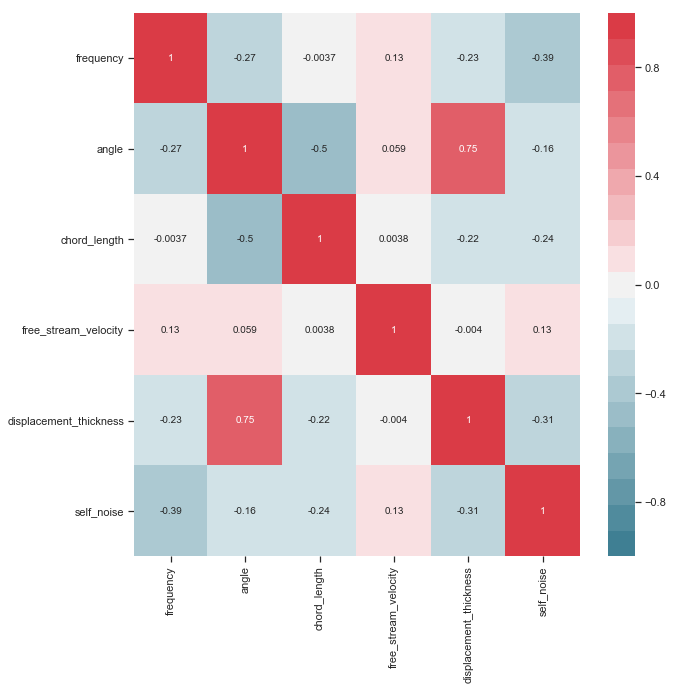

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(noise.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

The data is skewed left

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5123397731202703
0.5204698085428858


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performs poorly comparied to null model.  This appars to have high bias and low variance

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performs poorly and is overfitted to the training set. This appars to have high bias and low variance

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Bias problem becase of the skew of the data

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)


print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9900164543849158
0.9220050664889918


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The random forest model seems to peform better in on every mesausre. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

The random forest looks hard to improve. The linenar regression can be improved by making the model less complicated and by feature engineering to improve the model.

In [17]:
# here I removed a feature to imporove the model by lowing the complexity

X1 = noise.drop(['self_noise', 'displacement_thickness'], axis='columns')
y1 = noise.loc[:, 'self_noise']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

lr1 = LinearRegression()

lr1.fit(X_train, y_train)

print(lr1.score(X_train, y_train))
print(lr1.score(X_test, y_test))

0.4810419955640625
0.4874078347105288


In [18]:
# here I looked for non-linearal relations and found the 3rd degree gave the best performance


from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit(X1)
X3 = pf.transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X3, y)

lr3 = LinearRegression()
lr3.fit(X_train, y_train)

print(lr3.score(X_train, y_train))
print(lr3.score(X_test, y_test))

0.7451771542730377
0.6067938773953556


This is an improvement but the model needs more work. I guess I could remove more features

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset looks at the information of people who applied for credit and tells of they were extended credit.

In [78]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [79]:
credit.shape

(690, 16)

- Find out what data types are present.

In [80]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [81]:
# I got rid of the "?"
credit = credit.replace(['?'],np.NaN) 

In [82]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [83]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [84]:
# I want to keep the age so I will use the mean to fill in Na
credit.fillna(credit.mean(), inplace=True)
credit=credit.fillna(method='ffill')

In [85]:
# turned 2 which is age and number not object
credit.iloc[:, 1] = pd.to_numeric(credit.iloc[:,1], errors='coerce')

In [86]:
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Find out how many null values there are in each columns.

In [87]:
#Count Na 
credit.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [88]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,476,NaN,NaN,524,524,139,403,NaN,361,395,NaN,374,625,136,NaN,383
mean,NaN,31.483058,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,11.912872,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,22.580000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,28.375000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,37.750000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

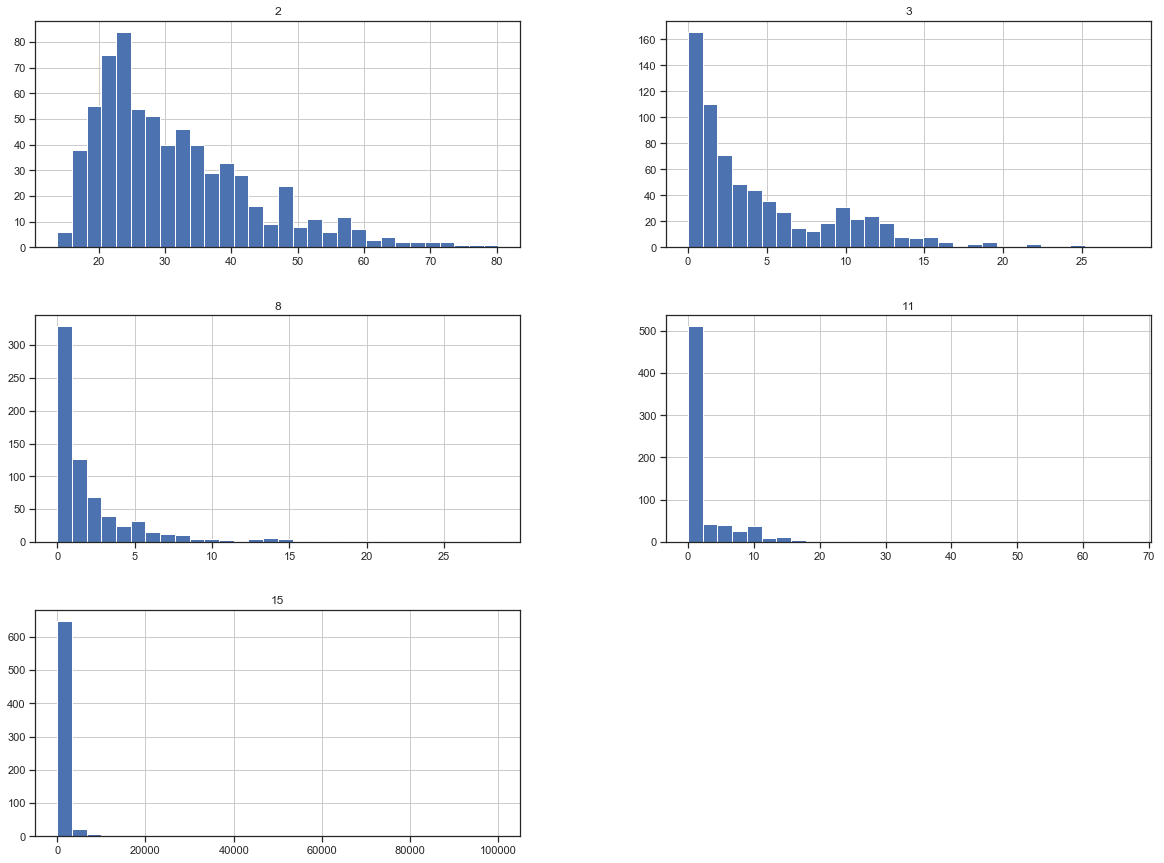

In [89]:
axis = credit.hist(bins =30, figsize = (20,15));

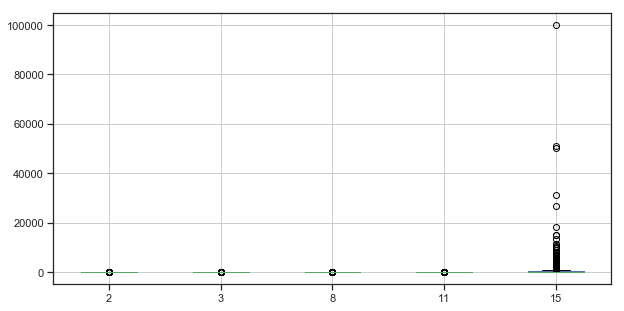

In [90]:
credit.boxplot(figsize = (10,5));

- Which variables are approximately normally distributed?

2 has an approximate normal distribution

- Which variables show strong skew?

3, 8, 14, 11, and 15 are a left skew

- Make a scatterplot of each feature variable with the target variable (`16`).

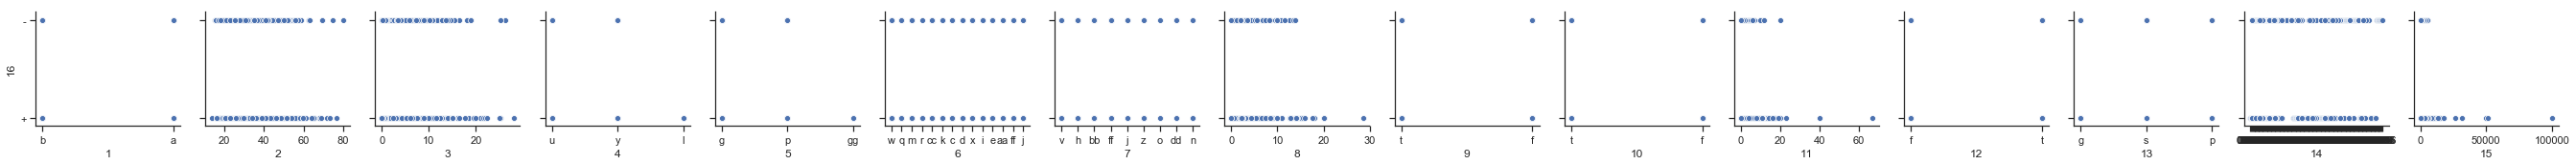

In [91]:
g = sns.pairplot(data=credit,
                 x_vars=credit.drop(credit.columns[15], axis='columns').columns,
                 y_vars=[credit.columns[15]],
                 height=2.5,
                )

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

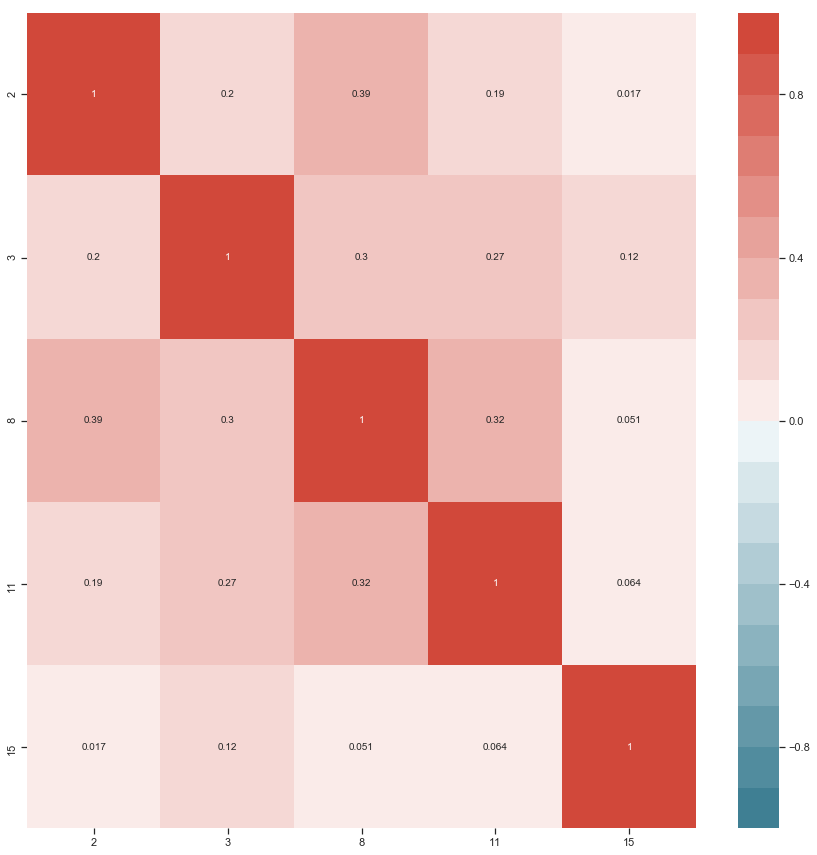

In [92]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(credit.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 15, n=20),
            annot=True,
            ax=ax,
           );

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

This data is also skewed left.  look for non-linearal relation I will seek models that rely on other relations

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

The model performs poorly comparied to null model.  This appars to have high bias and low variance

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [93]:
# I am looking at data types to see where I need to set dummy var
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

In [94]:
# I asm geting dummy var for apporved or unapproved for credit

credit = pd.get_dummies(credit, columns=[16], drop_first=True)

credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16_-
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


In [95]:
# I will select only number for my calulations

credit = credit.select_dtypes('number').dropna(axis='columns')

credit.head()

,2,3,8,11,15,16_-
0,30.83,0.000,1.25,1,0,0
1,58.67,4.460,3.04,6,560,0
2,24.50,0.500,1.50,0,824,0
3,27.83,1.540,3.75,5,3,0
4,20.17,5.625,1.71,0,0,0


In [96]:
credit.dtypes

2       float64
3       float64
8       float64
11        int64
15        int64
16_-      uint8
dtype: object

In [102]:
# I am setting the numbers as 

X2 = credit.drop(credit.columns[5], axis=1)
y2 = credit.iloc[:, 5]


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

lr2 = LogisticRegression()

lr2.fit(X_train, y_train)

predictions = lr2.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7584541062801933


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model did not perform well.  The variance is low.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model did not perform well.  The variance is low.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The variance is low due to the model underfitting

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)


predictions = rfc.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7729468599033816


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The model is overfitting thus bias is a problem.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I used a higher estimator to increase accuracy score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

rfc2 = RandomForestClassifier(n_estimators=430, oob_score=True)
rfc2.fit(X_train, y_train)


predictions = rfc2.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8164251207729468


The model has a slight improvement

In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions = dtc.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7198067632850241


The decision tree classifier is not much better

- **BONUS:** Keep going! Find ways to make your model better.